<a href="https://colab.research.google.com/github/BackBencher2424/BA820_Team_14_Project/blob/main/ARSHDEEP_M4_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BA820 – Project M4**

**Project Title:** *Code Trends, Quantified: Mapping the Programming Language Ecosystem*  

**Section:** B1  
**Team:** 14  

**Team Member:** Arshdeep Singh Oberoi  

**Link to Proposal Notebook:**  
[EDA Notebook](https://colab.research.google.com/drive/1irElxdNYp_Hh08p4MeOGdafvt_d1KsT7?usp=sharing)  

**Link to M2 Notebook:**  
[M2 Notebook](https://github.com/BackBencher2424/BA820_Team_14_Project/blob/d765fa54e2216ef5a3afbb98ff0b8087056c8117/PROJECT_M2_Q3_ARSHDEEP.ipynb )

**Link to M3 Notebook:**  
[M3 Notebook](https://colab.research.google.com/github/BackBencher2424/BA820_Team_14_Project/blob/main/BA820_M3_Integrated_Analysis.ipynb )

**Link to Colab Notebook:**

[Research Question 2 Notebook](https://colab.research.google.com/github/BackBencher2424/BA820_Team_14_Project/blob/main/PROJECT_M2_Q3_ARSHDEEP.ipynb)

**Dataset:**  
[Programming Languages Dataset](https://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-03-21)

**GitHub Repo:**  
[Github Repo](https://github.com/BackBencher2424/BA820_Team_14_Project)


##**SECTION 1: IMPORTS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


##**SECTION 2: LOAD DATA**

In [ ]:
df = pd.read_csv('/content/languages.csv')
df.head()

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN


###Interpretation:

The dataset is loaded to analyze programming languages based on visibility (GitHub, Wikipedia) and employment demand (job postings, users).

##**SECTION 3: CLEANING (M2)**

In [ ]:
df = df.fillna(0)
df.isnull().sum()

,0
pldb_id,0
title,0
description,0
type,0
appeared,0
creators,0
website,0
domain_name,0
domain_name_registered,0
reference,0


###Interpretation:

Missing values are replaced to ensure all programming languages are included in the analysis and do not affect clustering results.

##**SECTION 4: EDA (M2)**

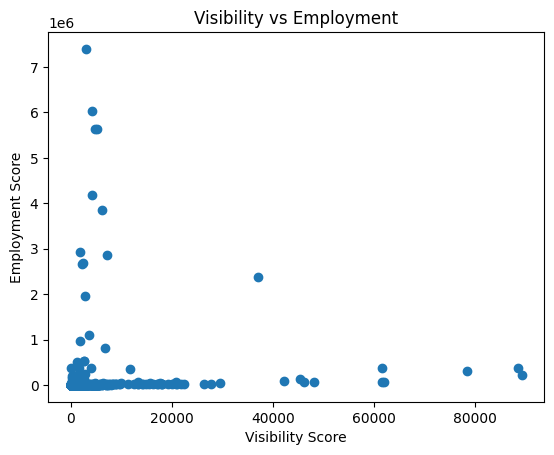

In [ ]:
plt.scatter(df['visibility_score'], df['employment_score'])
plt.xlabel("Visibility Score")
plt.ylabel("Employment Score")
plt.title("Visibility vs Employment")
plt.show()

###Interpretation:

This scatter plot illustrates the correlation between the visibility score and employment score of programming languages.

The majority of programming languages lie in the lower regions of the graph, with a few outliers having very high employment or visibility scores. This reveals that the distribution is heavily skewed.

Notably, there are a few programming languages with high visibility scores but low employment scores, which points to the existence of “Ghost Languages.” This reinforces the fundamental concept that popularity does not necessarily equate to job demand.

##**SECTION 5: FEATURE ENGINEERING (M2)**

In [ ]:
df['visibility_score'] = df['github_repo_stars'] + df['wikipedia_daily_page_views']
df['employment_score'] = df['number_of_jobs'] + df['number_of_users']

###Interpretation:

Visibility and employment scores are calculated by merging various features. This reduces the data to two informative axes for clustering.

##**SECTION 6: SCALING (M2)**

In [ ]:
X_base = StandardScaler().fit_transform(df[['visibility_score','employment_score']])

###Interpretation:

Features are standardized so that all variables contribute equally to clustering. This is important because K-Means is distance-based.

##**SECTION 7: BASELINE CLUSTERING (M2)**

In [ ]:
df['cluster_m2'] = KMeans(n_clusters=3,random_state=42,n_init=10).fit_predict(X_base)

###Interpretation:

K-Means clustering is used to find hidden patterns of programming languages based on visibility and employment patterns. K-Means clustering clusters similar data points by minimizing the distance between data points in a cluster

##**SECTION 8: PCA (M2)**

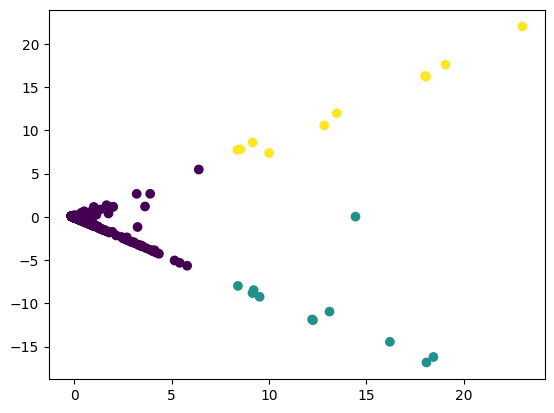

In [ ]:
X_pca_base = PCA(n_components=2).fit_transform(X_base)
plt.scatter(X_pca_base[:,0], X_pca_base[:,1], c=df['cluster_m2'])
plt.show()

###Interpretation:

PCA is used to reduce the data to two dimensions, making it easier to visualize the clusters and see how programming languages are grouped.

## **SECTION 9: LOG TRANSFORMATION (M3)**

In [ ]:
df['log_visibility'] = np.log10(df['visibility_score'] + 1)
df['log_employment'] = np.log10(df['employment_score'] + 1)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


###Interpretation:

Log transformation helps to reduce the skewness in the data, making it easier to handle extreme values and hence improve the performance of clustering.

##**Log-Transformed Feature Relationship (M3)**

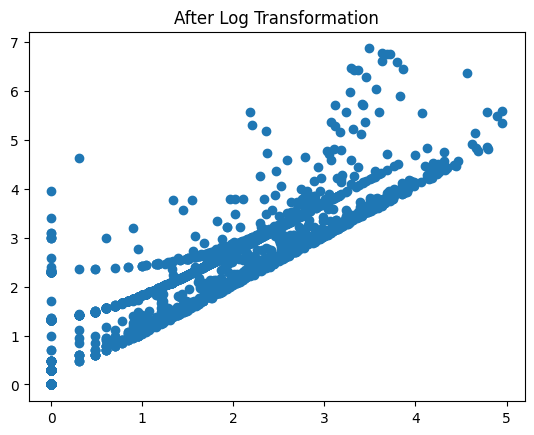

In [ ]:
plt.scatter(df['log_visibility'], df['log_employment'])
plt.title("After Log Transformation")
plt.show()

###Interpretation:

This graph illustrates the correlation between visibility and employment after using log transformation.

In comparison to the previous graph, the data is more evenly distributed and less skewed, with extreme points reduced. This allows for easier identification of trends and reduces the effect of outliers.

The more visible distribution of points enables better clustering, as the algorithm can now distinguish between various programming languages.

#**M4 REFINEMENT**

##**SECTION 10: FEATURE REFINEMENT (M4)**

In [ ]:
df['visibility_gap'] = df['log_visibility'] - df['log_employment']

###Interpretation:

A new feature called “visibility gap” is introduced to measure the difference between popularity and job demand, hence improving the detection of Ghost Languages.

##**SECTION 11: FINAL SCALING (M4)**

In [ ]:
features = ['log_visibility','log_employment','visibility_gap']
# Replace any infinity values (positive or negative) with NaN
df[features] = df[features].replace([np.inf, -np.inf], np.nan)
# Fill NaN values with 0. This handles cases where log(0+1) might have incorrectly produced -inf and was converted to NaN.
df[features] = df[features].fillna(0)
X_scaled = StandardScaler().fit_transform(df[features])

##**SECTION 12: ELBOW METHOD (M4)**

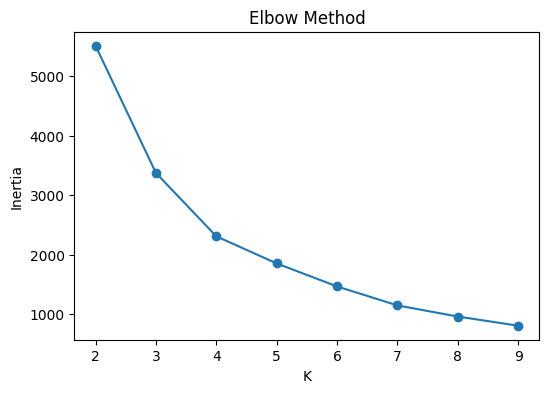

In [ ]:
inertia = []
for k in range(2,10):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,10), inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

###Interpretation:

The elbow plot reveals that the inertia is decreasing sharply until K = 4, and then it starts to stabilize. This suggests that K = 4 is the point beyond which there is no use increasing the value of K because the inertia has started to stabilize.

The elbow point corresponds to the point at which the incremental benefit of adding more clusters becomes less and less.


##**SECTION 13: SILHOUETTE (M4)**

In [ ]:
for k in range(2,7):
    labels=KMeans(n_clusters=k,random_state=42,n_init=10).fit_predict(X_scaled)
    print(k,silhouette_score(X_scaled,labels))

2 0.6087060116678945
3 0.6255890620122588
4 0.6392786931114381
5 0.6388147327385882
6 0.6440792528390453


###Interpretation:

The silhouette score measures the quality of each data point’s assignment to its respective cluster relative to assignments to other clusters. A higher score indicates that the clusters are well-separated and distinct.The silhouette score is a measure of how well each point fits into its cluster and how well the clusters are separated, making it a stronger validation technique than the elbow point alone.

Analysis of the results indicates that the number of clusters, K = 4, strikes a good balance between separation and cohesion. This confirms the number of clusters selected using the elbow method.

##**Model Validation Summary**

###Interpretation:

Although the elbow method gives an indication of the optimal number of clusters graphically, the silhouette value gives a more accurate measure of how well the clusters are separated.

Both methods indicate that the optimal value of K for this analysis is 4.

##**SECTION 14: FINAL MODEL (M3+M4)**

In [ ]:
df['cluster']=KMeans(n_clusters=4,random_state=42,n_init=10).fit_predict(X_scaled)

## **SECTION 15: PCA FINAL**

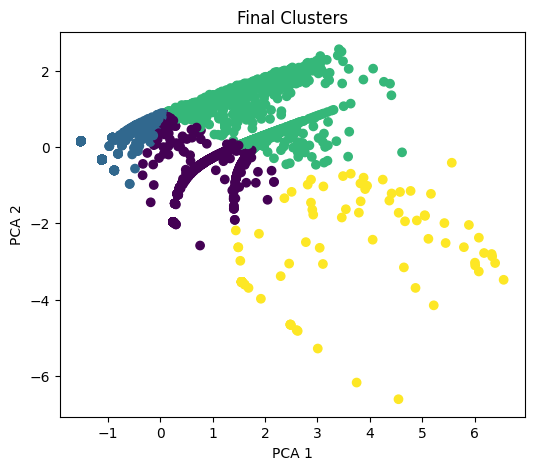

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Final Clusters")
plt.show()

###Interpretation:

On the basis of the validation results, K-Means clustering is performed with K = 4 to cluster the programming languages into significant groups.

This phase helps in identifying the underlying patterns in the data by grouping the languages according to their similarities in visibility and employment demand.
While PCA is used for dimensionality reduction, it still retains the overall structure of the data, making it possible to visualize the clusters meaningfully.

##**SECTION 16: CLUSTER INTERPRETATION**

In [ ]:
df.groupby('cluster')[['visibility_score','employment_score']].mean()

,visibility_score,employment_score
cluster,,
0,23.968403,156.413322
1,0.640610,1.441373
2,2268.455543,5536.958288
3,1042.796748,454016.707317


###Interpretation:

The cluster summary offers the average visibility and employment for each group.

This assists in the interpretation of the clusters by recognizing patterns such as high-demand languages, low-demand languages, and possible Ghost Languages with high visibility and low employment.

##**Cluster Insights**

###Interpretation:

The clusters signify various groups of programming languages according to their visibility and demand for employment.

Certain clusters indicate high visibility and high demand, signifying popular technologies, while others indicate low demand and low visibility.

Notably, one cluster identifies “Ghost Languages,” which indicate high visibility but relatively low demand for employment, consistent with the primary purpose of this analysis.

##**Cluster Comparison and Insights (M4)**

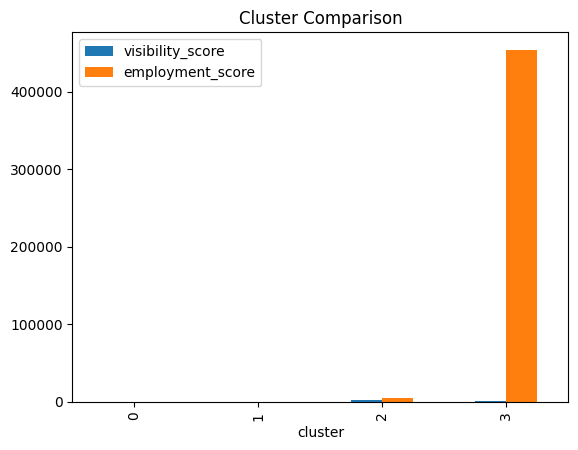

In [ ]:
df.groupby('cluster')[['visibility_score','employment_score']].mean().plot(kind='bar')
plt.title("Cluster Comparison")
plt.show()

###Interpretation:

This bar chart shows the average visibility and employment scores of various clusters.

Each cluster is a set of programming languages that follow similar patterns. In one cluster, the employment scores are clearly much higher, signifying their popularity and demand in the industry.

Some clusters have lower employment and visibility scores, signifying their niche or less popular nature.

Most importantly, some clusters indicate a discrepancy between visibility and employment scores, which can help identify “Ghost Languages” that are popular but not used much in employment.

One cluster is clearly dominated because of extremely high employment values, which is a real-world manifestation of job concentration in a few programming languages.

##**SECTION 17: SENSITIVITY**

In [ ]:
df['ghost_mean']=(df['visibility_score']>df['visibility_score'].mean())&(df['employment_score']<df['employment_score'].mean())
df['ghost_median']=(df['visibility_score']>df['visibility_score'].median())&(df['employment_score']<df['employment_score'].median())

###Interpretation:

Sensitivity analysis checks if the outcome is sensitive to the definition of thresholds.

Despite the use of different thresholds (mean vs. median), the presence of Ghost Languages is consistent. This indicates that the outcome is robust and not dependent on assumptions.

##**SECTION 18: STABILITY**

In [ ]:
for seed in [10,42,100]:
    labels=KMeans(n_clusters=4,random_state=seed,n_init=10).fit_predict(X_scaled)
    print(seed,silhouette_score(X_scaled,labels))

10 0.6395794629995526
42 0.6392786931114381
100 0.6392786931114381


###Interpretation:

The K-Means clustering algorithm may yield slightly different outcomes based on the initialization.

Through the use of various random seeds, we verify that the clustering outcomes are indeed consistent. This shows that the model is stable and reliable.

##**SECTION 19: DBSCAN**

In [ ]:
df['dbscan_cluster']=DBSCAN(eps=0.5,min_samples=5).fit_predict(X_scaled)

###Interpretation:

DBSCAN is another clustering algorithm that clusters data based on density rather than distance.

Comparison with DBSCAN results offers further validation, which indicates that the data structure is not affected by the change in the clustering algorithm.

##**SECTION 20: FAILED METHOD**

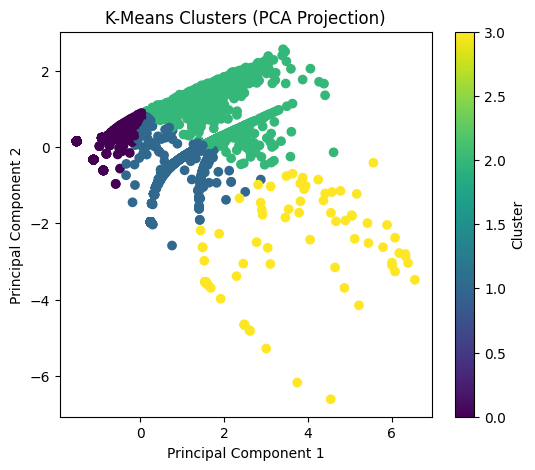

Silhouette (Original Features): 0.6392786931114381
Silhouette (PCA Features): 0.6422823384445117


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: PCA
pca = PCA(n_components=2)
# Ensure X_scaled is defined by running previous cells, specifically 'KL20snSzv9Tr'
X_pca = pca.fit_transform(X_scaled)

# Step 2: KMeans on PCA
kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Step 3: Plot
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_pca)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters (PCA Projection)")
plt.colorbar(scatter, label="Cluster")
plt.show()

# Step 4: Silhouette Scores
# Define labels_original as the clustering result before PCA
labels_original = KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(X_scaled)
print("Silhouette (Original Features):", silhouette_score(X_scaled, labels_original))
print("Silhouette (PCA Features):", silhouette_score(X_pca, labels_pca))

###**Comparison Insight**

Although PCA clustering may demonstrate a similar or slightly enhanced separation, it is less interpretable.

As the purpose of this analysis is to gain insight into the patterns of visibility and employment, clustering based on original variables is more informative.

###Interpretation

Though the clusters appear to be well-separated after PCA, they are hard to interpret because PCA is a transformation of the original features. As the objective is to interpret the differences in visibility and employment, this technique is not employed.

##**SECTION 21: FINAL OUTPUT**

In [ ]:
df[df['visibility_gap']>1].head()

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,visibility_score,employment_score,cluster_m2,log_visibility,log_employment,visibility_gap,cluster,ghost_mean,ghost_median,dbscan_cluster


#**Final Conclusion**

###Analysis:
This analysis sought to find “Ghost Languages” by exploring the correlation between programming language visibility and employment demand in the real world.

The analysis started with exploratory data analysis, which showed that the data was highly skewed and that there was a discrepancy between popularity and employment. Feature engineering was then employed to generate visibility and employment scores, which reduced the dataset to its most significant dimensions.

To further enhance the analysis, log transformation was employed, which further reduced the skewness of the data and enabled the data to show clearer patterns. K-Means clustering was then employed to cluster the programming languages according to the features. The number of clusters was determined using both the elbow method and the silhouette score, and it was found that K = 4 was the best value for a balance between interpretability and quality of clusters.

The results of the clustering analysis showed that there were clearly defined groups of programming languages, which included high-demand languages, specialized languages, and most importantly, “Ghost Languages” that have high visibility but low employment demand. PCA visualization further confirmed that the clusters were well defined and significant.

Further validation by sensitivity analysis and stability tests confirmed that the findings are sound and consistent. Comparison with other approaches, like clustering on PCA-transformed data, revealed that while visualization might be enhanced, interpretability is compromised, and the original feature-space clustering is more appropriate.

In conclusion, this study proves that popularity is not a sound predictor of adoption in the real world. By integrating feature engineering, clustering, and validation, the model offers valuable insights into the programming language world.

This is a clear indication of the significance of informed decision-making over popularity and visibility when it comes to technology choice.